# Pymaceuticals Inc.
---

### Analysis

- In the first chart i observed this:
- Drug Regimen
Two drug regimens are mentioned:

Capomulin: Administered to one female mouse.
Ketapril: Administered to four mice (two females and two males).
Sex Distribution
The dataset comprises three female mice and two male mice, providing a nearly balanced representation of both sexes.

Age Distribution
The ages of the mice vary considerably:

Youngest: 2 months
Oldest: 21 months
Age distribution:

Capomulin group: 9 months
Ketapril group: 2, 11, 15, and 21 months
Weight Distribution
The weights of the mice range from 22 grams to 30 grams.

Weight distribution:

Capomulin group: 22 grams
Ketapril group: 25, 29, 29, and 30 grams
Summary
This dataset serves as a baseline for a study comparing the effects of Capomulin and Ketapril on tumor growth and metastasis in mice. At the initial timepoint:

All mice had identical tumor volumes with no metastasis.
Most subjects were on the Ketapril regimen.
The mice exhibited a wide range of ages and weights, providing a diverse sample for analysis.
Further timepoints and measurements would be necessary to evaluate the efficacy of the drug regimens in reducing tumor size and preventing metastasis.

And in general i observed:
Initial Tumor Volume and Metastasis:

All mice started with a uniform tumor volume and no metastasis, providing a consistent baseline for comparison across drug regimens.
Drug Regimen Effects:

Capomulin has the lowest mean tumor volume (40.68 mm³) and standard error, suggesting it might be more effective in controlling tumor growth compared to other drugs.
Ketapril shows the highest mean tumor volume (55.24 mm³) and variability, indicating less effectiveness and greater inconsistency in results.
Propriva data, though limited, shows an increase in tumor volume over time, necessitating more data points for a comprehensive analysis.
Sex and Age Distribution:

The dataset includes more female than male mice, but the sample size is small.
Mice ages vary widely, which could affect drug efficacy due to biological differences at different life stages.
Weight Distribution:

The weights of mice are relatively consistent across drug regimens, with slight variations. The weight consistency helps isolate the drug effects from potential weight-related factors.
Summary Statistics:

Variance and standard deviations for each drug regimen indicate how consistently each drug performs across different subjects.
Capomulin appears to have the most stable performance with the lowest variance and standard deviation.

Conclusion:
The dataset provides a foundational overview of the initial conditions and early responses to different drug regimens in mice. Capomulin shows the most promise in reducing tumor volume consistently, while Ketapril demonstrates higher variability and less efficacy. Propriva's preliminary data indicates tumor growth over time, highlighting the need for additional data to draw firm conclusions. Further timepoints and measurements will be crucial in comprehensively evaluating the long-term efficacy of these treatments.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_mouse_study.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
number_mice=len(combined_mouse_study["Mouse ID"].unique())
number_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mouse_id = combined_mouse_study[combined_mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_id_duplicate = mouse_id["Mouse ID"].unique()

mouse_no_duplicate = combined_mouse_study[~combined_mouse_study["Mouse ID"].isin(mouse_id_duplicate)]

mouse_no_duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
number_mice_no_duplicate = len(mouse_no_duplicate["Mouse ID"].unique())
number_mice_no_duplicate

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = combined_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev',
    'sem': 'Tumor Volume Std. Err.'})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [33]:
summary_statistics = mouse_no_duplicate.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Volume='mean',
    Median_Volume='median',
    Volume_Variance='var',
    Volume_Std_Dev='std',
    Volume_Std_Err='sem'
)
print("{:>80}".format("Tumor Volume (mm3)"))
summary_statistics.head()


                                                              Tumor Volume (mm3)


,Mean_Volume,Median_Volume,Volume_Variance,Volume_Std_Dev,Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

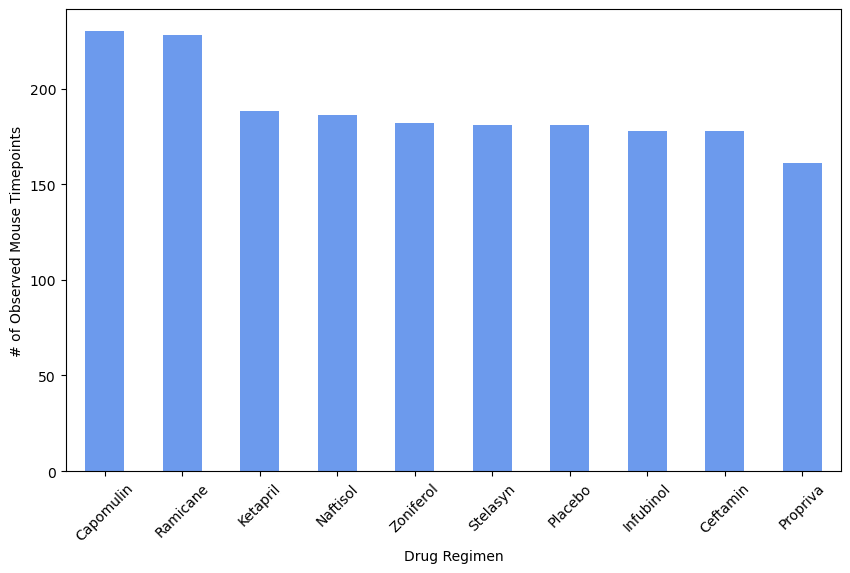

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_drug = combined_mouse_study['Drug Regimen'].value_counts()
number_drug.plot(kind='bar', figsize=(10,6), rot=45, color='cornflowerblue', alpha=0.95)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


plt.show()

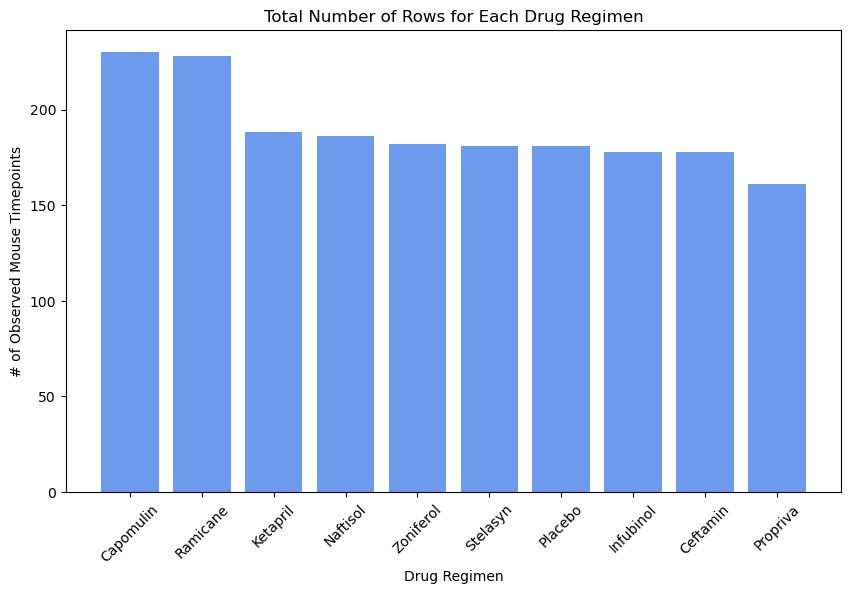

In [46]:
# Agrupar por 'Drug Regimen' y contar las filas para cada régimen
number_drug = combined_mouse_study['Drug Regimen'].value_counts()

# Generar el gráfico de barras usando pyplot
plt.figure(figsize=(10, 6))
plt.bar(number_drug.index, number_drug.values, color='cornflowerblue', alpha=0.95)

# Añadir etiquetas y título
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

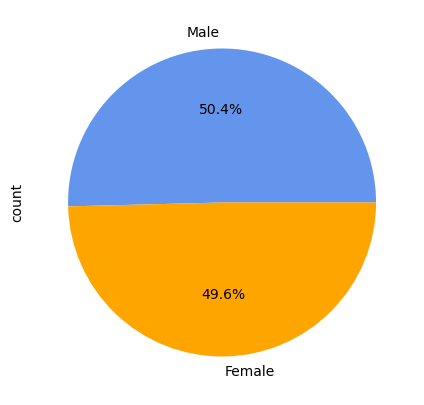

In [52]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = mouse_no_duplicate.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart
mice_gender.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), startangle=0, labels=['Male', 'Female'], colors=['cornflowerblue', 'orange'])
plt.show()

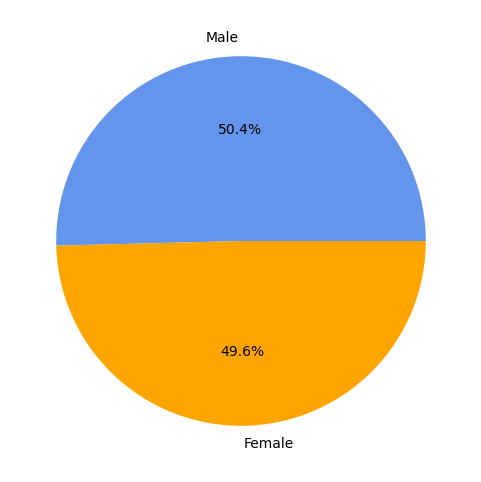

In [57]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.figure(figsize=(6,6))
plt.pie(mice_gender, labels=mice_gender.index, autopct='%1.1f%%', startangle=0, colors=['cornflowerblue', 'orange'])

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = mouse_no_duplicate[mouse_no_duplicate["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_tumor_volume_df = pd.merge(last_timepoints, filtered_df, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(treatment_data)
    
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


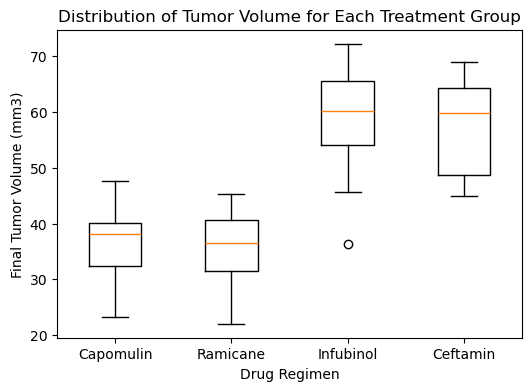

In [60]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(6, 4))
data_to_plot = [final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in selected_regimens]
ax1.boxplot(data_to_plot, labels=selected_regimens)
ax1.set_title('Distribution of Tumor Volume for Each Treatment Group')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

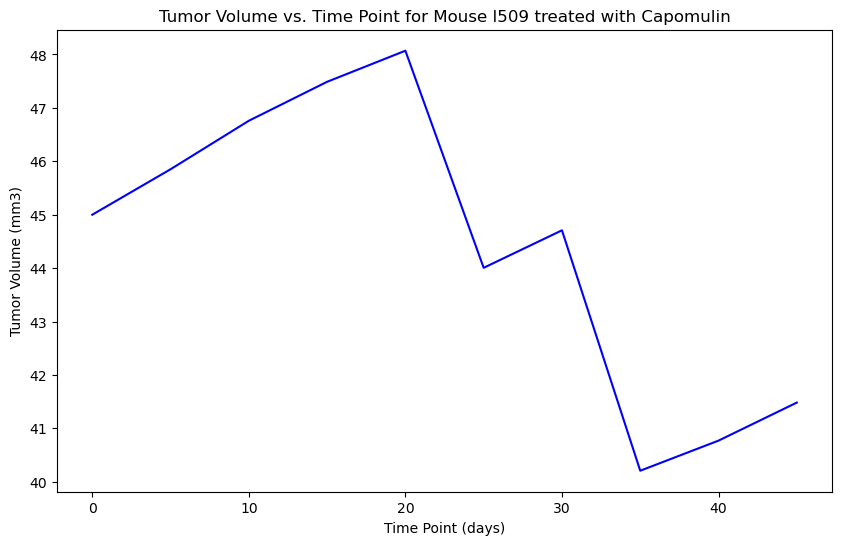

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_mouse_study[combined_mouse_study["Drug Regimen"] == "Capomulin"]
mouse_id = "l509"
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
if not single_mouse_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], linestyle='-', color='b')
    
    plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
    plt.xlabel('Time Point (days)')
    plt.ylabel('Tumor Volume (mm3)')

    plt.show()

else:
    print(f"No data found for Mouse ID {mouse_id} treated with Capomulin.")

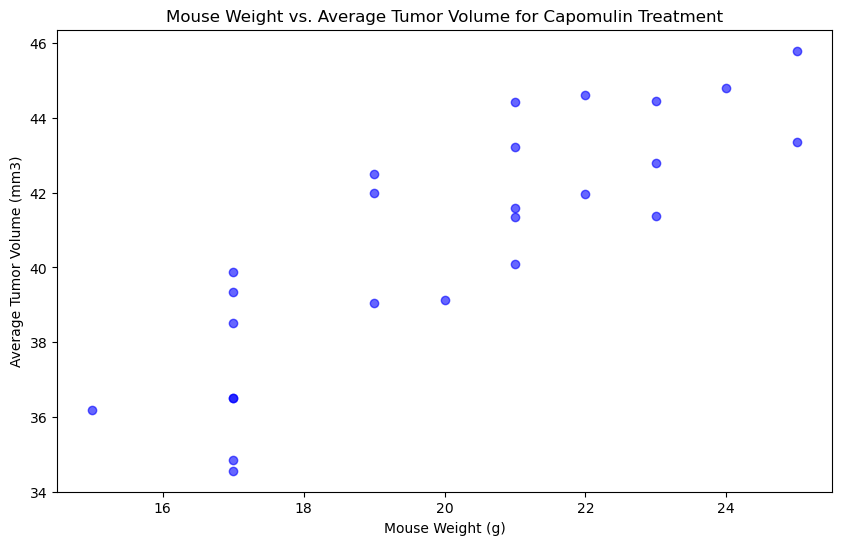

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_mouse_study[combined_mouse_study["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID").agg({
    "Tumor Volume (mm3)": "mean",
    "Weight (g)": "mean"  # Assuming you have a weight column
}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color='blue', alpha=0.6)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

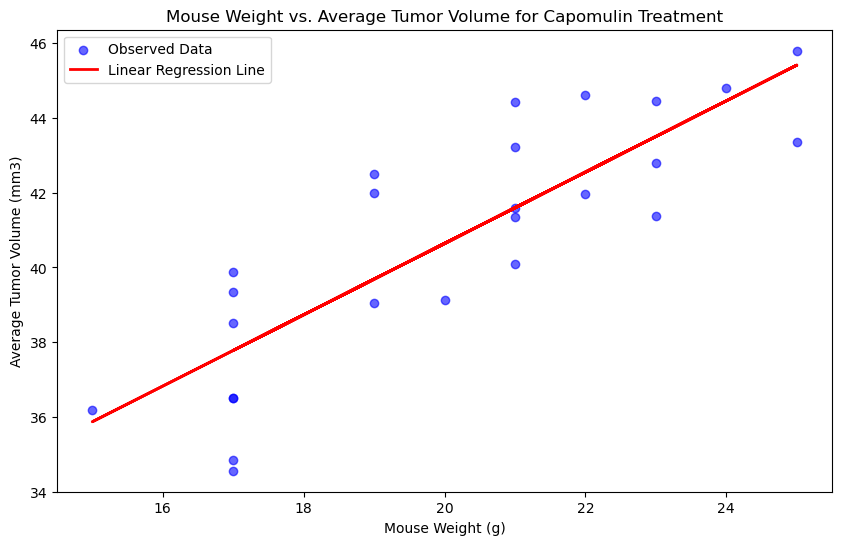

In [65]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
correlation_coefficient = correlation[0]
slope, intercept, r_value, p_value_regression, std_err = st.linregress(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
x_values = average_tumor_volume["Weight (g)"]
y_values = slope * x_values + intercept
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color='blue', alpha=0.6, label='Observed Data')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()